<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
The most basic unsupervised way to model any given data set is to assume that it's made up of distinct groups of object that share properties. Recognizing different properties in dataset by creating categories is called clustering. This way machine can detect certain objects are more similar to each other than others.

# Importing Required Libraries 

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Uploading Dataset

In [1]:
from google.colab import files
file = files.upload()

Saving datasets_Iris.csv to datasets_Iris.csv


### Importing the Dataset to pandas data frame

In [6]:
df = pd.read_csv('datasets_Iris.csv')

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


As we can see that *Iris dataset* is a four dimentional data set. Because it has four features: **SepalLength, SepalWidth, PetalLength, PetalWidth**

### Starting with Conventional Data Cleaning Procedure 

In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
len(df)

150

Text(0, 0.5, 'Width')

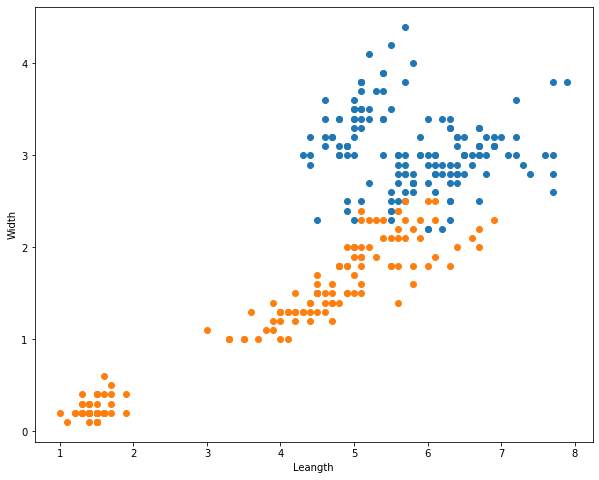

In [23]:
plt.figure(figsize=(10, 8))
# SepalLeangth, SepalWidth
plt.scatter(df.iloc[:,1], df.iloc[:,2])
# petalLength, petalWidth
plt.scatter(df.iloc[:,3], df.iloc[:,4])
plt.xlabel('Leangth')
plt.ylabel('Width')